In [56]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from plotly.graph_objects import Figure, Scatter, Bar

In [27]:
df = pd.read_parquet('data/2_preprocessed/preprocessed_sales.parquet')

df.head().T

,0,1,2,3,4
row_id,42433,22253,48883,11731,22255
order_id,AG-2011-2040,IN-2011-47883,HU-2011-1220,IT-2011-3647632,IN-2011-47883
order_date,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00
ship_date,2011-06-01 00:00:00,2011-08-01 00:00:00,2011-05-01 00:00:00,2011-05-01 00:00:00,2011-08-01 00:00:00
ship_mode,Standard Class,Standard Class,Second Class,Second Class,Standard Class
customer_id,TB-11280,JH-15985,AT-735,EM-14140,JH-15985
customer_name,Toby Braunhardt,Joseph Holt,Annie Thurman,Eugene Moren,Joseph Holt
segment,Consumer,Consumer,Consumer,Home Office,Consumer
city,Constantine,Wagga Wagga,Budapest,Stockholm,Wagga Wagga
state,Constantine,New South Wales,Budapest,Stockholm,New South Wales


In [28]:
numerical_features = ['sales', 'quantity', 'discount', 'shipping_cost']
categorical_features = ['ship_mode', 'segment', 'country', 'market', 'region', 'category',
                        'sub-category', 'order_priority']
features = numerical_features + categorical_features
target = 'profit'

# Train Test Split

In [29]:
df.shape

(51290, 24)

In [30]:
from sklearn.model_selection import train_test_split

seed = 42
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=5000, random_state=seed)

# Gradient Boosting Regressor

In [31]:
cat_pipeline = Pipeline([
    ('one_hot_encode', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

featurisation = ColumnTransformer(transformers=[
    ('cat_pipeline', cat_pipeline, categorical_features),
    ('num_pipeline', num_pipeline, numerical_features),
])

pipeline = Pipeline([
    ('features', featurisation),
    ('model', GradientBoostingRegressor())
])

gb_model = pipeline.fit(X_train, y_train)

In [32]:
gb_y_train_hat = gb_model.predict(X_train)
gb_y_test_hat = gb_model.predict(X_test)

gb_train_mse = mean_squared_error(y_train, gb_y_train_hat)
gb_train_rmse = mean_squared_error(y_train, gb_y_train_hat, squared=False)
gb_train_mae = mean_absolute_error(y_train, gb_y_train_hat)
gb_train_r2 = r2_score(y_train, gb_y_train_hat)

gb_test_mse = mean_squared_error(y_test, gb_y_test_hat)
gb_test_rmse = mean_squared_error(y_test, gb_y_test_hat, squared=False)
gb_test_mae = mean_absolute_error(y_test, gb_y_test_hat)
gb_test_r2 = r2_score(y_test, gb_y_test_hat)

print(f'Train MSE: {gb_train_mse}')
print(f'Train RMSE: {gb_train_rmse}')
print(f'Train MAE: {gb_train_mae}')
print(f'Train R2: {gb_train_r2}\n')

print(f'Test MSE: {gb_test_mse}')
print(f'Test RMSE: {gb_test_rmse}')
print(f'Test MAE: {gb_test_mae}')
print(f'Test R2: {gb_test_r2}')

Train MSE: 5796.0619585555105
Train RMSE: 76.13187215979593
Train MAE: 35.35778527790962
Train R2: 0.8131815554974898

Test MSE: 7195.273051136762
Test RMSE: 84.82495535593733
Test MAE: 36.672234124014366
Test R2: 0.7069500944219985


# XGBOOST

In [33]:
from xgboost import XGBRegressor

cat_pipeline = Pipeline([
    ('one_hot_encode', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

featurisation = ColumnTransformer(transformers=[
    ('cat_pipeline', cat_pipeline, categorical_features),
    ('num_pipeline', num_pipeline, numerical_features),
])

pipeline = Pipeline([
    ('features', featurisation),
    ('model', XGBRegressor())
])

xgb_model = pipeline.fit(X_train, y_train)

### XGB metrics

In [34]:
xgb_y_train_hat = xgb_model.predict(X_train)
xgb_y_test_hat = xgb_model.predict(X_test)

xgb_train_mse = mean_squared_error(y_train, xgb_y_train_hat)
xgb_train_rmse = mean_squared_error(y_train, xgb_y_train_hat, squared=False)
xgb_train_mae = mean_absolute_error(y_train, xgb_y_train_hat)
xgb_train_r2 = r2_score(y_train, xgb_y_train_hat)

xgb_test_mse = mean_squared_error(y_test, xgb_y_test_hat)
xgb_test_rmse = mean_squared_error(y_test, xgb_y_test_hat, squared=False)
xgb_test_mae = mean_absolute_error(y_test, xgb_y_test_hat)
xgb_test_r2 = r2_score(y_test, xgb_y_test_hat)

print(f'Train MSE: {xgb_train_mse}')
print(f'Train RMSE: {xgb_train_rmse}')
print(f'Train MAE: {xgb_train_mae}')
print(f'Train R2: {xgb_train_r2}\n')

print(f'Test MSE: {xgb_test_mse}')
print(f'Test RMSE: {xgb_test_rmse}')
print(f'Test MAE: {xgb_test_mae}')
print(f'Test R2: {xgb_test_r2}')

Train MSE: 2477.1051135126963
Train RMSE: 49.77052454528379
Train MAE: 26.101376382166322
Train R2: 0.9201580439469652

Test MSE: 6671.724727051339
Test RMSE: 81.6806263874815
Test MAE: 33.23952698099328
Test R2: 0.7282732305765764


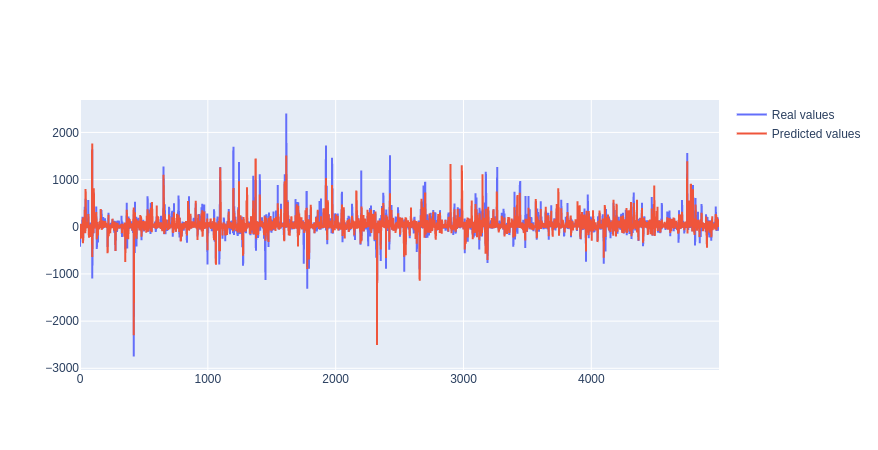

In [35]:
fig = Figure([
    Scatter(x=y_test.reset_index().index, y=y_test, name='Real values'),
    Scatter(x=y_test.reset_index().index, y=xgb_y_test_hat, name='Predicted values')
])
fig.show()

# Catboost


In [36]:
from catboost import CatBoostRegressor

scaler = StandardScaler()

X_train_cb = X_train.copy()
X_test_cb = X_test.copy()

X_train_cb[numerical_features] = scaler.fit_transform(X_train_cb[numerical_features])
X_test_cb[numerical_features] = scaler.fit_transform(X_test_cb[numerical_features])

cb_model = CatBoostRegressor(loss_function='RMSE', cat_features=categorical_features, verbose=0)
cb_model.fit(X_train_cb, y_train)

In [37]:
cb_y_train_hat = cb_model.predict(X_train_cb)
cb_y_test_hat = cb_model.predict(X_test_cb)

cb_train_mse = mean_squared_error(y_train, cb_y_train_hat)
cb_train_rmse = mean_squared_error(y_train, cb_y_train_hat, squared=False)
cb_train_mae = mean_absolute_error(y_train, cb_y_train_hat)
cb_train_r2 = r2_score(y_train, cb_y_train_hat)

cb_test_mse = mean_squared_error(y_test, cb_y_test_hat)
cb_test_rmse = mean_squared_error(y_test, cb_y_test_hat, squared=False)
cb_test_mae = mean_absolute_error(y_test, cb_y_test_hat)
cb_test_r2 = r2_score(y_test, cb_y_test_hat)

print(f'Train MSE: {cb_train_mse}')
print(f'Train RMSE: {cb_train_rmse}')
print(f'Train MAE: {cb_train_mae}')
print(f'Train R2: {cb_train_r2}\n')

print(f'Test MSE: {cb_test_mse}')
print(f'Test RMSE: {cb_test_rmse}')
print(f'Test MAE: {cb_test_mae}')
print(f'Test R2: {cb_test_r2}')

Train MSE: 5091.334365961841
Train RMSE: 71.35358691728007
Train MAE: 31.492194697525395
Train R2: 0.835896307960067

Test MSE: 6909.046550645363
Test RMSE: 83.1206746281896
Test MAE: 34.455989249078286
Test R2: 0.7186075601424515


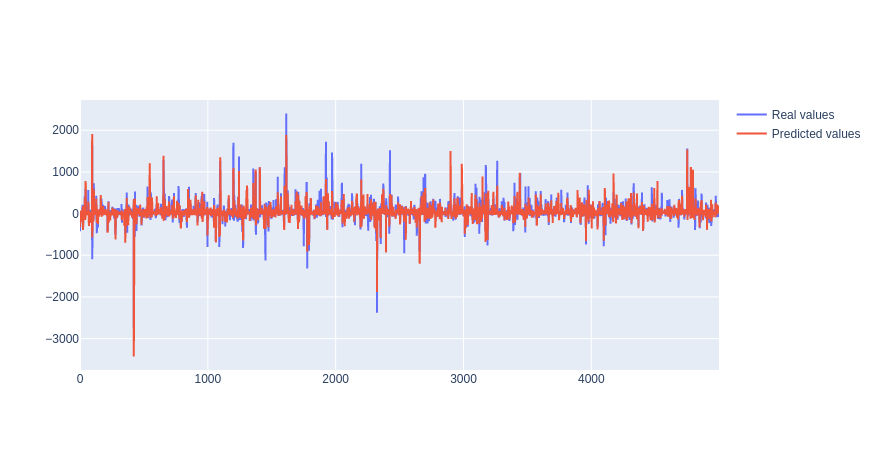

In [38]:
fig = Figure([
    Scatter(x=y_test.reset_index().index, y=y_test, name='Real values'),
    Scatter(x=y_test.reset_index().index, y=cb_y_test_hat, name='Predicted values')
])
fig.show()

# Metrics summary

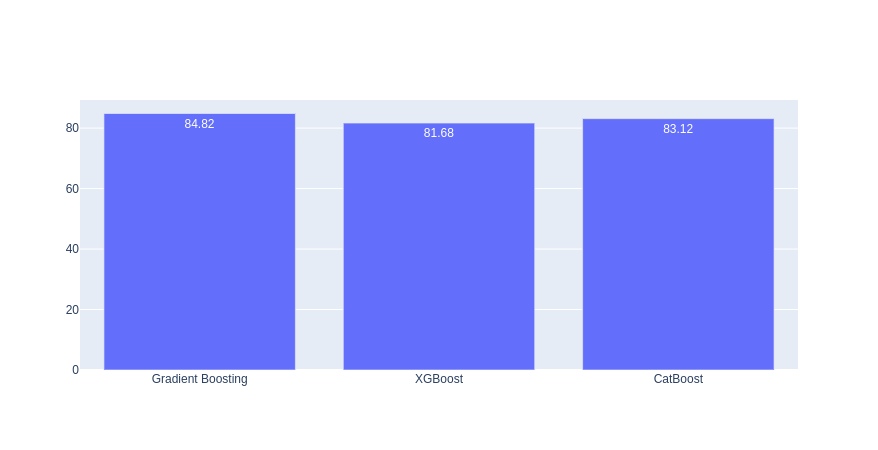

In [39]:
y_values = [gb_test_rmse, xgb_test_rmse, cb_test_rmse]
y_label = [round(value, 2) for value in y_values]

fig = Figure([
    Bar(x=['Gradient Boosting', 'XGBoost', 'CatBoost'], y=y_values, text=y_label, textposition='auto')
])

fig.show()

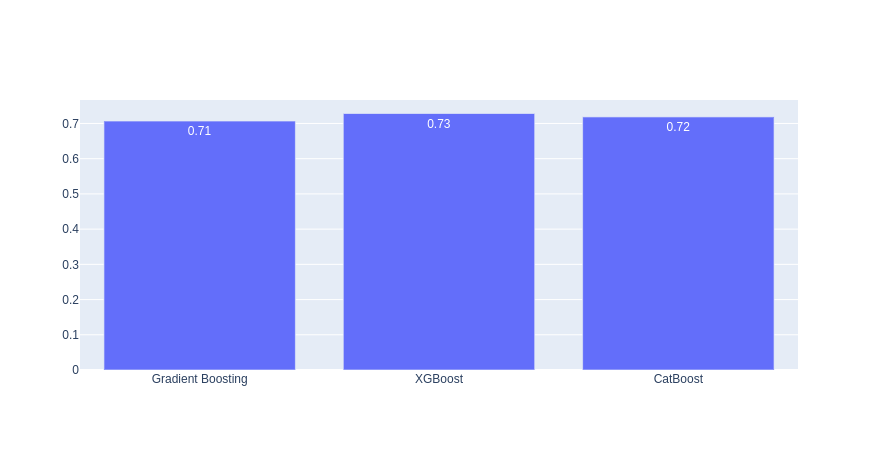

In [40]:
y_values = [gb_test_r2, xgb_test_r2, cb_test_r2]
y_label = [round(value, 2) for value in y_values]

fig = Figure([
    Bar(x=['Gradient Boosting', 'XGBoost', 'CatBoost'], y=y_values, text=y_label, textposition='auto')
])

fig.show()

# Model Explanation

In [63]:
import shap

shap.initjs()

In [68]:
cb_explainer = shap.TreeExplainer(cb_model)
cb_shap_values = cb_explainer.shap_values(X_train_cb)

shap.force_plot(cb_explainer.expected_value, cb_shap_values[0, :], X_train_cb.iloc[0, :])

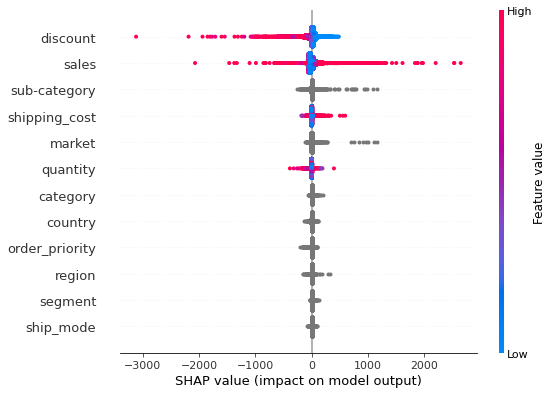

In [70]:
shap.summary_plot(cb_shap_values, X_train_cb)